<a href="https://colab.research.google.com/github/Aravindh4404/FYPSeagullClassification01/blob/main/OrigAdultInflight1410_pytorch_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


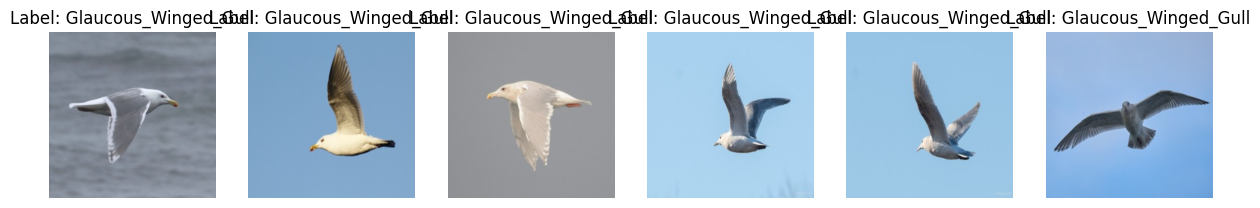

Class distribution: {'Glaucous_Winged_Gull': 124, 'Slaty_Backed_Gull': 127}


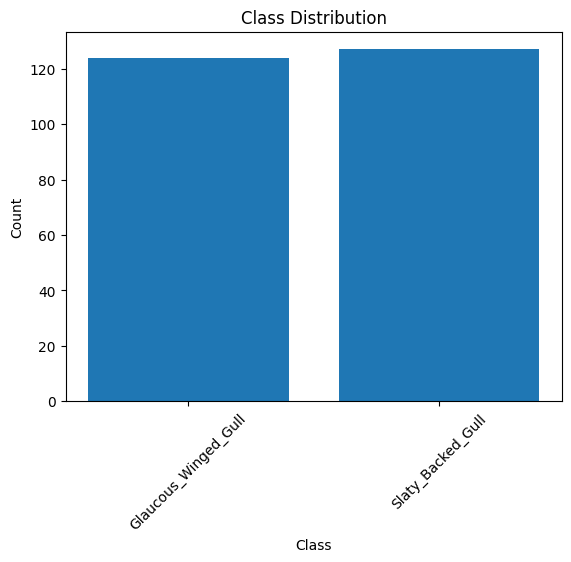

In [ ]:
import os
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

from google.colab import drive
drive.mount('/content/drive')


# Define path to dataset and transformation
data_path = '/content/drive/My Drive/FYP/Dataset/Original_Adult_In-flight/train'

# Define transformations - to normalize and resize the images
transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
])

# Load the dataset
dataset = datasets.ImageFolder(data_path, transform=transform)

# Visualize a few images from the dataset to understand the data
def visualize_data(dataset, num_images=6):
    fig, ax = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img, label = dataset[i]
        ax[i].imshow(img.permute(1, 2, 0))
        ax[i].set_title(f"Label: {dataset.classes[label]}")
        ax[i].axis('off')
    plt.show()

# Visualize first few images
visualize_data(dataset)

# Analyzing class distribution (data imbalance)
def analyze_class_distribution(dataset):
    class_counts = {}
    for _, label in dataset:
        class_name = dataset.classes[label]
        if class_name not in class_counts:
            class_counts[class_name] = 0
        class_counts[class_name] += 1
    return class_counts

class_distribution = analyze_class_distribution(dataset)
print("Class distribution:", class_distribution)

# Plot class distribution
plt.bar(class_distribution.keys(), class_distribution.values())
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


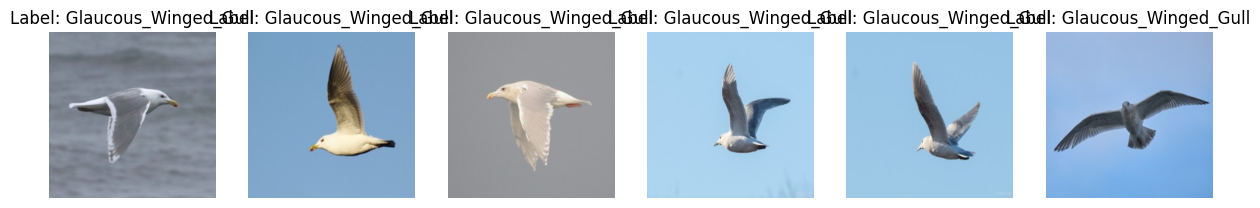

Epoch 1, Loss: 2.3182373046875
Model successfully overfitted on the batch
Predictions: tensor([1, 0, 1, 0])
Actual Labels: tensor([1, 0, 1, 0])
Model saved at: /content/drive/My Drive/FYP/simple_cnn_model.pth
Epoch [1/20], Loss: 2.826359298450989
Epoch [2/20], Loss: 0.6367455730587244
Epoch [3/20], Loss: 0.45814675934612753
Epoch [4/20], Loss: 0.3702223181724548
Epoch [5/20], Loss: 0.21447940550744535
Epoch [6/20], Loss: 0.13892030539922418
Epoch [7/20], Loss: 0.11193416730966418
Epoch [8/20], Loss: 0.08205926397815347
Epoch [9/20], Loss: 0.06250908936373889
Epoch [10/20], Loss: 0.03795229443843709
Epoch [11/20], Loss: 0.030510204997844993
Epoch [12/20], Loss: 0.028362466050311924
Epoch [13/20], Loss: 0.013787732587079517
Epoch [14/20], Loss: 0.010331424729665742
Epoch [15/20], Loss: 0.00786807963391766
Epoch [16/20], Loss: 0.008543711063975935
Epoch [17/20], Loss: 0.0060368497529998425
Epoch [18/20], Loss: 0.003956339055148419
Epoch [19/20], Loss: 0.0029861990723293276
Epoch [20/20], 

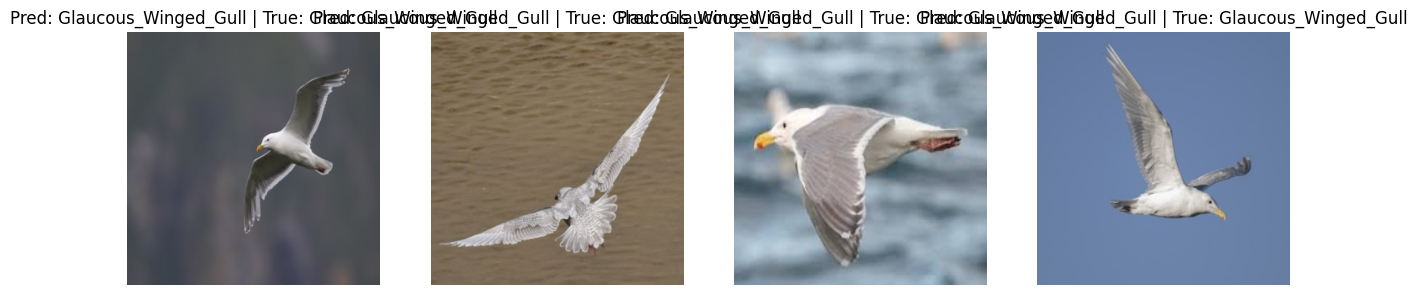

<ipython-input-19-b96a2560b2d3>:215: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path))


Test Loss: 4.289368282318245, Test Accuracy: 58.8235294117647%


In [19]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Mount Google Drive to save and load the model
from google.colab import drive
drive.mount('/content/drive')

# Set seed for reproducibility
torch.manual_seed(42)

# Data preparation (Tip: inspect and preprocess your data)
data_path = '/content/drive/My Drive/FYP/Dataset/Original_Adult_In-flight/train'

transform = transforms.Compose([
    transforms.Resize((300, 300)),  # Resize to 300x300 based on dataset specifics
    transforms.ToTensor(),
])

# Load dataset and visualize examples
dataset = datasets.ImageFolder(data_path, transform=transform)

def visualize_data(dataset, num_images=6):
    """ Visualize dataset images """
    fig, ax = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img, label = dataset[i]
        ax[i].imshow(img.permute(1, 2, 0))
        ax[i].set_title(f"Label: {dataset.classes[label]}")
        ax[i].axis('off')
    plt.show()

visualize_data(dataset)

# Split dataset into train/validation sets (Tip: setup early pipeline)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders
batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define a simple CNN model (Tip: start with simple models)
class SimpleCNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  # Conv layer
        self.pool = nn.MaxPool2d(2, 2)               # Pooling layer
        self.fc1 = None                              # Placeholder for FC layer
        self._initialize_fc(input_size)

    def _initialize_fc(self, input_size):
        """ Dynamically calculate FC layer size """
        with torch.no_grad():
            dummy_input = torch.randn(1, *input_size)
            dummy_output = self.pool(torch.relu(self.conv1(dummy_input)))
            flattened_size = dummy_output.view(1, -1).size(1)
            self.fc1 = nn.Linear(flattened_size, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))     # Conv -> ReLU -> Pool
        x = x.view(x.size(0), -1)                   # Flatten the tensor
        x = self.fc1(x)                             # Fully connected layer
        return x

# Initialize the model (Tip: start with fixed seed)
input_size = (3, 300, 300)  # Update to match the actual image size
model = SimpleCNN(input_size)

# Define loss and optimizer (Tip: use Adam with a safe LR)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (Tip: instrument code for debugging)
def train(model, loader, criterion, optimizer, epochs=20):
    """ Train the model over the dataset """
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(loader)}")

# Validation loop (Tip: evaluate simple models early on)
def validate(model, loader, criterion):
    """ Validate the model performance """
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Validation Loss: {val_loss/len(loader)}, Accuracy: {accuracy}%')

# Overfit a single batch (Tip: debugging by overfitting a single batch)
single_batch = next(iter(train_loader))

def overfit_single_batch(model, batch, criterion, optimizer, epochs=100):
    """ Overfit on a single batch to detect issues """
    device = torch.device("cpu")
    model.to(device)

    inputs, labels = batch
    inputs, labels = inputs.to(device), labels.to(device)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}, Loss: {loss.item()}')

        if loss.item() < 0.01:
            print("Model successfully overfitted on the batch")
            break

    # Sanity check after overfitting
    with torch.no_grad():
        outputs = model(inputs)
        predicted = torch.argmax(outputs, dim=1)
        print(f'Predictions: {predicted}')
        print(f'Actual Labels: {labels}')

# Run overfitting on a single batch (Tip: overfit a small batch for early debugging)
overfit_single_batch(model, single_batch, criterion, optimizer)

# Save the model to Google Drive
model_save_path = '/content/drive/My Drive/FYP/simple_cnn_model.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved at: {model_save_path}")

# Visualize model predictions
def visualize_predictions(model, dataset, batch_size=4):
    """ Visualize model predictions """
    model.eval()
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    inputs, labels = next(iter(dataloader))
    inputs, labels = inputs.to('cpu'), labels.to('cpu')

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

    # Visualize images with their predicted and true labels
    fig, ax = plt.subplots(1, batch_size, figsize=(15, 5))
    for i in range(batch_size):
        ax[i].imshow(inputs[i].permute(1, 2, 0))
        ax[i].set_title(f'Pred: {dataset.classes[preds[i]]} | True: {dataset.classes[labels[i]]}')
        ax[i].axis('off')
    plt.show()

# Train and validate the model
train(model, train_loader, criterion, optimizer, epochs=20)
validate(model, val_loader, criterion)

# Visualize predictions
visualize_predictions(model, dataset)

# Load test dataset
test_data_path = '/content/drive/My Drive/FYP/Dataset/Original_Adult_In-flight/test'
test_transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
])
test_dataset = datasets.ImageFolder(test_data_path, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Test the model on the test set
def test(model, loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Loss: {test_loss/len(loader)}, Test Accuracy: {accuracy}%')

# Load the saved model
model = SimpleCNN(input_size)
model.load_state_dict(torch.load(model_save_path))
model.eval()

# Run the model on the test set
test(model, test_loader, criterion)
